# ACTIVIDAD 19

In [2]:
#Descargar librerias
import pandas as pd
import numpy as np
import matplotlib as plot

In [3]:
#Traer el archivo
data_students=pd.read_csv("clean_students_complete.csv")

In [4]:
#cambiar el indice
data_students.set_index('Student ID', inplace=True)

In [5]:
#eliminar una conlumna
data_students=data_students.drop(["Unnamed: 0"], axis=1)
data_students.head(3)

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60


### Cuántos alumnos por escuela tuvieron el mejor puntaje en "reading", y con ello saber que género es el que predomina en este filtro

In [16]:
#Buscar el maximo de reading
reading_max=data_students[data_students["reading_score"]==data_students["reading_score"].max()]
reading_max

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
22,Kimberly Stewart,F,11th,Huang High School,99,84
35,Benjamin Carlson,M,10th,Huang High School,99,61
78,Jason Thompson,M,12th,Huang High School,99,57
90,Ronald Garcia,M,9th,Huang High School,99,86
98,Virginia Ramirez,F,10th,Huang High School,99,89
...,...,...,...,...,...,...
38990,Amber Reynolds,F,12th,Thomas High School,99,87
39033,Michael Everett,M,11th,Thomas High School,99,91
39114,Gregory Taylor,M,10th,Thomas High School,99,77


In [17]:
gender_scname_rmax=reading_max[["gender", "school_name"]]
gender_scname_rmax

,gender,school_name
Student ID,,
22,F,Huang High School
35,M,Huang High School
78,M,Huang High School
90,M,Huang High School
98,F,Huang High School
...,...,...
38990,F,Thomas High School
39033,M,Thomas High School
39114,M,Thomas High School


In [18]:
dummies_genero_rmax=pd.get_dummies(reading_max[["gender"]])
dummies_genero_rmax.head()

,gender_F,gender_M
Student ID,,
22,1,0
35,0,1
78,0,1
90,0,1
98,1,0


In [19]:
plotbygen_rmax=pd.concat([gender_scname_rmax, dummies_genero_rmax], axis=1)
plotbygen_rmax

,gender,school_name,gender_F,gender_M
Student ID,,,,
22,F,Huang High School,1,0
35,M,Huang High School,0,1
78,M,Huang High School,0,1
90,M,Huang High School,0,1
98,F,Huang High School,1,0
...,...,...,...,...
38990,F,Thomas High School,1,0
39033,M,Thomas High School,0,1
39114,M,Thomas High School,0,1


In [20]:
plot_grouped_rmax=plotbygen_rmax.groupby(["school_name"]).sum()
plot_grouped_rmax.head(10)

,gender_F,gender_M
school_name,,
Bailey High School,58,56
Cabrera High School,27,31
Figueroa High School,50,49
Ford High School,35,24
Griffin High School,22,30
Hernandez High School,64,60
Holden High School,7,5
Huang High School,35,40
Johnson High School,63,51


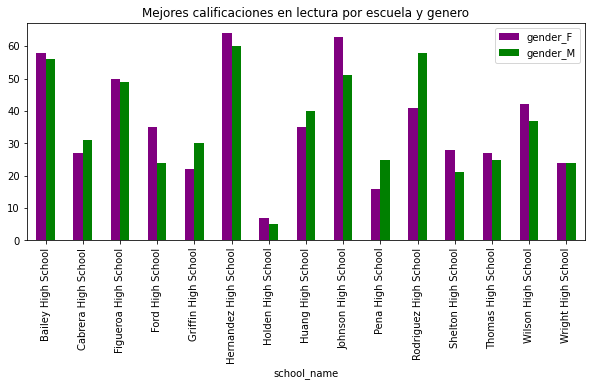

In [23]:
plotbar_max=plot_grouped_rmax.plot(kind="bar",color=["purple", "green"],figsize=(10,4), title='Alumnos con las mejores calificaciones en lectura por escuela y genero')

In [ ]:
#Hernandez High School es la escuela con la mayor cantidad de alumnos que tienen mejores calificaciones en lectura y predomina el genero femenino.

### Identifica cuántos alumnos por escuela tuvieron el peor puntaje en "reading", y con ello saber que género es el que predomina en este filtro.

In [26]:
#Buscar el minimo de reading
reading_min=data_students[data_students["reading_score"]==data_students["reading_score"].min()]
reading_min

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
26,Melanie Decker,F,9th,Huang High School,63,85
37,Jesse Newton,M,10th,Huang High School,63,66
60,Jared Wood,M,9th,Huang High School,63,89
124,Bonnie Mckinney,F,11th,Huang High School,63,65
131,Thomas Strickland,M,9th,Huang High School,63,77
...,...,...,...,...,...,...
37420,Darryl Kelly,M,12th,Ford High School,63,62
37422,Megan Heath,F,10th,Ford High School,63,79
37484,Angela Turner,F,12th,Ford High School,63,58


In [8]:
gender_scname_rmin=reading_min[["gender", "school_name"]]
gender_scname_rmin

,gender,school_name
Student ID,,
26,F,Huang High School
37,M,Huang High School
60,M,Huang High School
124,F,Huang High School
131,M,Huang High School
...,...,...
37420,M,Ford High School
37422,F,Ford High School
37484,F,Ford High School


In [9]:
dummies_genero_rmin=pd.get_dummies(reading_min[["gender"]])
dummies_genero_rmin.head()

,gender_F,gender_M
Student ID,,
26,1,0
37,0,1
60,0,1
124,1,0
131,0,1


In [10]:
plotbygen_rmin=pd.concat([gender_scname_rmin, dummies_genero_rmin], axis=1)
plotbygen_rmin

,gender,school_name,gender_F,gender_M
Student ID,,,,
26,F,Huang High School,1,0
37,M,Huang High School,0,1
60,M,Huang High School,0,1
124,F,Huang High School,1,0
131,M,Huang High School,0,1
...,...,...,...,...
37420,M,Ford High School,0,1
37422,F,Ford High School,1,0
37484,F,Ford High School,1,0


In [22]:
plot_grouped_rmin=plotbygen_rmin.groupby(["school_name"]).sum()
plot_grouped_rmin.head()

,gender_F,gender_M
school_name,,
Bailey High School,64,71
Figueroa High School,36,42
Ford High School,42,43
Hernandez High School,64,70
Huang High School,42,40


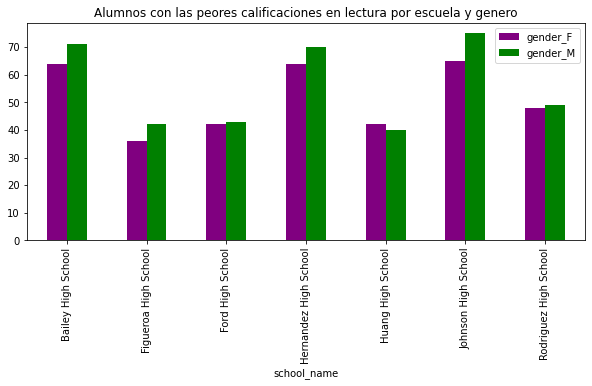

In [24]:
plotbar_min=plot_grouped_rmin.plot(kind="bar",color=["purple", "green"],figsize=(10,4), title='Alumnos con las peores calificaciones en lectura por escuela y genero')

In [15]:
#Johnson High School es la que tiene la mayor cantidad de alumnos con las calificaciones mas bajas en lectura y predomina en el genero Masculino